# Linear Regression Analysis on Drug Performance
## DMS - Regression Assignment (v1.2)

 - **Author: Abhishek Narvekar**
 - **Student number: 649744**
 - **Date: 24/03/2023**
 - **Dataset taken from: https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation**

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* matplotlib
* seaborn
* sklearn
* eli5

From these we will need the following libraries:

In [1]:
#enter here all those 'from .... import ....'

try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
try:
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    print('PyPlot was not installed, installed and imported')   
try:
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('statsmodels was not installed, installed and imported')
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')
try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as seaborn
    print('seaborn was not installed, installed and imported')
try:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')
    
try:
    import eli5
    from eli5.sklearn import PermutationImportance
    print('eli5 already installed, only imported')
except:
    !pip install eli5
    import eli5 
    from eli5.sklearn import PermutationImportance
    print('eli5 was not installed, installed and imported')

NumPy already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported
pandas already installed, only imported
seaborn already installed, only imported
sklearn already installed, only imported
eli5 already installed, only imported


# 1. The Data
We are going to use the datafile **Drug_Performance.csv**

This dataset contains the performance metrics of 37 common medical conditions, which mainly includes the drug name, reviews effectivenesses, convinence easeofuse of the drug and satisfaction rate which is based on people reviews.

Source:  https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation

In [2]:
#enter the code to load the data
drugPerformanceDF = pd.read_csv('Drug_Performance.csv')
drugPerformanceDF.columns = drugPerformanceDF.columns.str.lower()

Here's a quick look at the data:

In [3]:
#enter the code to see the first few rows of the data
drugPerformanceDF.head()

,condition,drug,indication,type,reviews,effective,easeofuse,satisfaction,information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


The column name of this drug are described as follows:
 - The column name 'drug': tells us the name of the drug
 - The column name 'indication': the purpose of the drug particularly which can be viewed on the packet
 - The column name 'type': determined the type of drug which could be generic or a brand
 - The column name 'effective': tells us the effectivnesses of this drug which is based on the customer reviews
 - The column name 'easeofuse': tells us how convinent it was to use the drug which is again based on customer reviews.
 - The column name 'satisfaction': tells us the satisfaction level of any particular drug based on customer reviews.
 - The column name 'information': tells us the any other general information about the drug.

Information above taken from link: https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation

After using the methods pairplot and heatmap method from the seaborn library in python, we can see that there is a correlation between the 'satisfication' and 'effective' column followed by 'easeofuse' and 'satisfaction' column. 

Therefore, in this dataset we will be performing linear regression analysis on **two independent variables X's 'satisfaction' and 'easeofuse'** and predict the **dependent variable Y 'satisfaction'** 


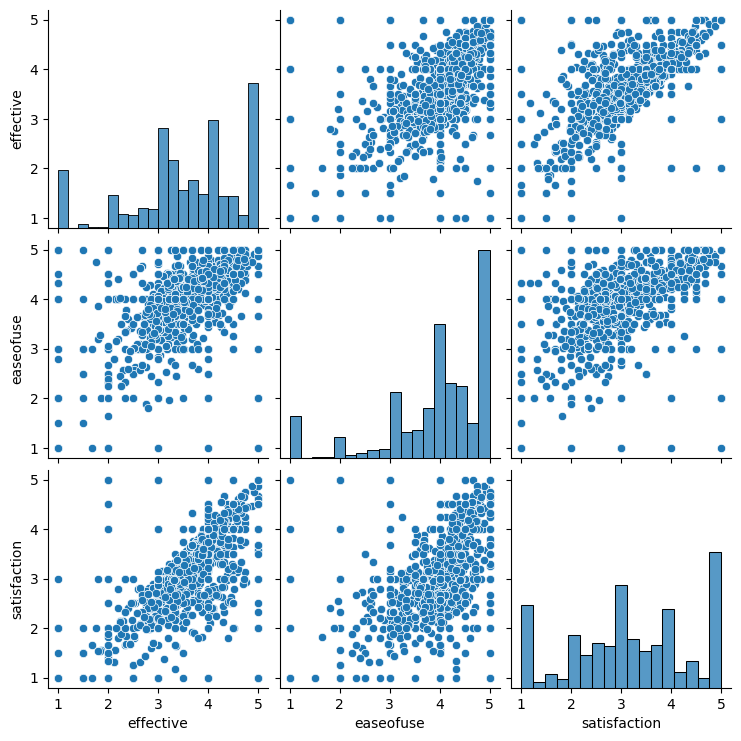

In [4]:
columns =drugPerformanceDF.iloc[:,0:9]
sns.pairplot(columns)
plt.show()

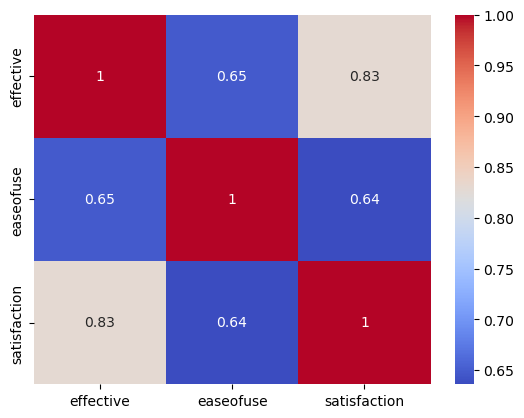

In [5]:
corr_matrix = drugPerformanceDF.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting drug **satisfaction** rate in the dataset based on the drug effectivenesses (**effective**) of the drug. Below a visualisation of these two:

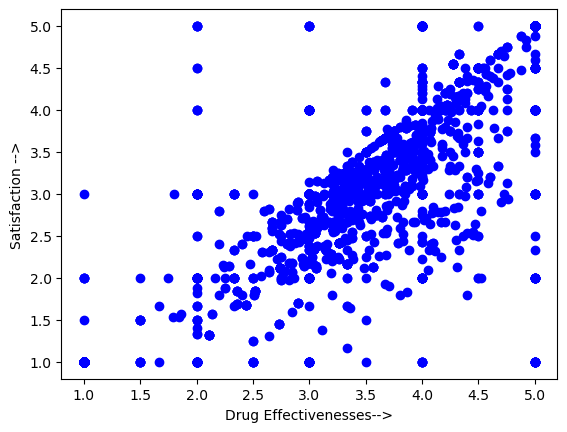

In [6]:
#enter code to show scatterplot
effectiveX = drugPerformanceDF['effective'].to_numpy()
satisfactionY = drugPerformanceDF['satisfaction'].to_numpy()

plt.scatter(effectiveX, satisfactionY, color='blue')
plt.xlabel('Drug Effectivenesses-->')
plt.ylabel('Satisfaction -->')
plt.show()

As we can see from the scatterplot there seems to be a strong linear relationship between the drug effectivenesses and satisfaction, so as the drug effectivenesses increases the drug satisfaction rate also increases.

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We will be using our first x-variable 'effective'

In [7]:
#add code to create training and testing data
X = drugPerformanceDF['effective'].to_numpy().reshape(-1, 1)
y = drugPerformanceDF['satisfaction'].to_numpy().reshape(-1, 1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# verify if the test is 30% of original drug performance dataset
print(0.3*X.shape[0])
X_test.shape[0]

665.6999999999999


666

Now setup the linear regression model and fit our training data:

In [8]:
#add code to create linear regression model
drugEffectivenessesRegressionModel = LinearRegression().fit(X_train, y_train)
y_prediction = drugEffectivenessesRegressionModel.predict(X_train)

#getting the idea of the coeffecient and intercepts
print('Intercept:', drugEffectivenessesRegressionModel.intercept_)
print('Coefficients',drugEffectivenessesRegressionModel.coef_)
X_train


Intercept: [0.00059232]
Coefficients [[0.90210985]]


array([[2.  ],
       [5.  ],
       [5.  ],
       ...,
       [3.73],
       [3.  ],
       [3.4 ]])

Lets see how well the model performed with the training data, by visualisation:

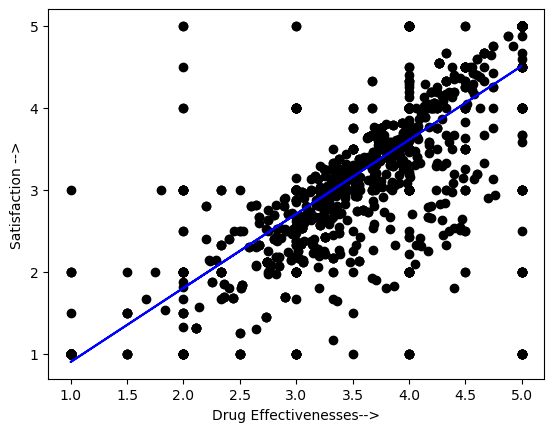

In [9]:
#add code to show scatterplot with the regression line
plt.scatter(X_train , y_train, color='black')
plt.plot(X_train, y_prediction, color='blue')
plt.xlabel("Drug Effectivenesses-->")
plt.ylabel("Satisfaction -->")
plt.show()

As we can see from the above graph, there appears to be a positive correlation between drug effectivenesses and the satisfaction rate. We can also determine that the regression value is almost close to value 1, which describes a very strong correlation between drug effectivenesses and satisfaction.  which means more effective the drug the more level of satisfacton within the people.

Besides from a visual, we can also use some metrics.

In [11]:
#code to show the results of the statsmodels.api summary
x_train = sm.add_constant(X_train)

model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     3373.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:04:58   Log-Likelihood:                -1619.9
No. Observations:                1553   AIC:                             3244.
Df Residuals:                    1551   BIC:                             3254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.058      0.010      0.9

R-squared basically stands for cooefficient of determination, It basically measures the proportion of the variance with dependendent variable y (satisfaction) with independent variable x (effective) in our dataset, The value of R-squared in our dataset is 0.685, which means the relationship between two variables explains 68.5% of variation observed in our regression model can be explained by the drug effectivenesses.
    
The Adjusted (Adj) R.squared shows that the regression model seems to be effective in explaining the variability with the dependent variable, drug-satisfaction with independent variable effectivenesses.
    

The 'const' value in the 'coeff' column represent the constant coefficient, It indicates the predicted value of the dependent variable y (satisfaction) when the values of independent variable (Drug Effectivenesses)in the model are zero. In this case it is less than zero which makes sense because if drug effectivenesses is zero the drug satisfaction rate is also zero.

The 'x1' value in the 'coeff' column states that for every independent variable (drug effectivenesses), there is an increase in dependent variable (satisfaction rate) by 0.9021 and since we have found a strong positive correlation between drug effectivenesses and satisfaction, we can now understand as to why the dependent variable increases by 0.9021

We can also check how well our model worked by using the testing data:

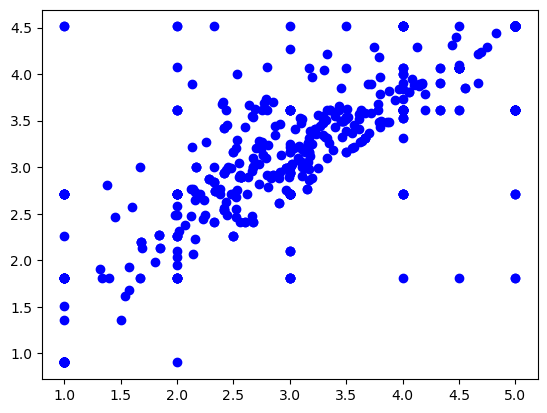

In [12]:
#code to show how well the model performmed in testing data
predictions = drugEffectivenessesRegressionModel.predict(X_test)
plt.scatter(y_test,predictions, color='blue')
plt.show()

We can use the metric, to check how well our model performed against the test data. This value is the determination coefficient of r-squared.

In [13]:
drugEffectivenessesRegressionModel.score(X_test, y_test)

0.6914313621137348

The metric returns us the value: 0.669096263385626. Which is 0.69(rounded to 2 decimal places).This means our model correctly classified 69% of the test samples in the test dataset. This is not a very high accuracy, but metrics alone is not the only way to evuluate the performance of the classifiaction model.There could be some data that was lost while training the model which may give it a low performance

Now we repeat all these steps, but using the other x-variable:'easeofuse' column in the drugPerformance dataframe.

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict the satisfaction rate among people, based on the drug easeofuse.

Below a visualisation of these two:

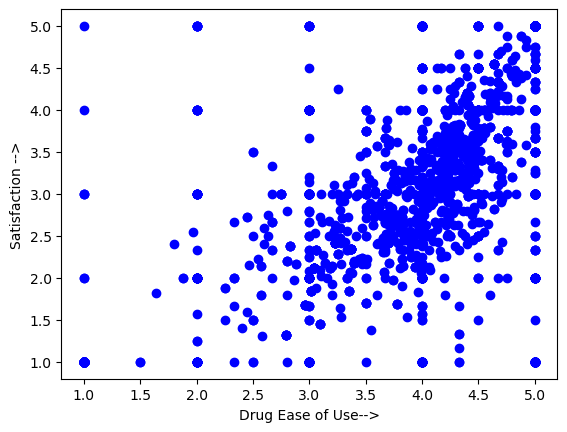

In [14]:
#enter code to show scatterplot
easeofuseX = drugPerformanceDF['easeofuse'].to_numpy().reshape(-1, 1)
satisfactionY = drugPerformanceDF['satisfaction'].to_numpy().reshape(-1, 1)

plt.scatter(easeofuseX, satisfactionY, color='blue')
plt.xlabel('Drug Ease of Use-->')
plt.ylabel('Satisfaction -->')
plt.show()

As we can see from the scatterplot there seems to be a strong linear relationship between the drug effectivenesses and easofuse, so as the drug easofuse or the convinence of the drug increases the drug satisfaction rate also increases.

Creating again the training/testing sets and the model itself:

In [15]:
#add code here to split the data and the model itself:
X_train2, X_test2, Y_train2, y_test2 = train_test_split(easeofuseX, satisfactionY, test_size=0.5, random_state=105)

# verify if the test is 50% of original drug performance dataset
print(0.5*easeofuseX.shape[0])
X_test2.shape[0]

1109.5


1110

In [16]:
#adding the code to create linear regression model
drugEaseOfUseRegressionModel = LinearRegression().fit(X_train2, Y_train2)
y_prediction = drugEaseOfUseRegressionModel.predict(X_train2)

#getting the idea of the coeffecient and intercepts
print('Intercept:', drugEaseOfUseRegressionModel.intercept_)
print('Coefficients',drugEaseOfUseRegressionModel.coef_)
X_train2

Intercept: [0.17641383]
Coefficients [[0.76580309]]


array([[2.  ],
       [3.04],
       [3.9 ],
       ...,
       [3.  ],
       [2.  ],
       [2.88]])

Now lets see how this performs:

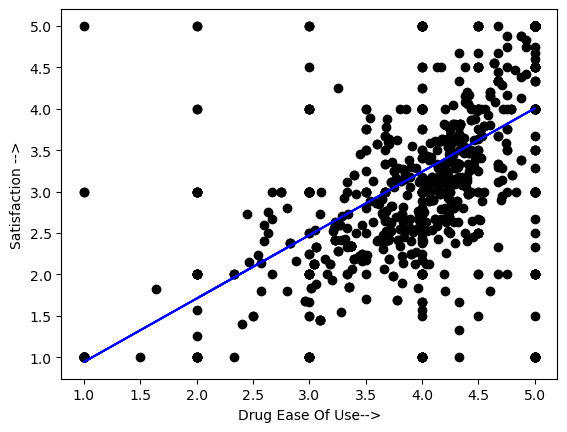

In [17]:
#add code to show both the scatterplot with the regression line
plt.scatter(X_train2 , Y_train2, color='black')
plt.plot(X_train2, y_prediction, color='blue')
plt.xlabel("Drug Ease Of Use-->")
plt.ylabel("Satisfaction -->")
plt.show()

In [18]:
#code to show the results of the statsmodels.api summary
x_train2 = sm.add_constant(X_train2).reshape(-1, 1)

mymodel = sm.OLS(Y_train2, X_train2).fit()
predictions = mymodel.predict(x_train2) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     3373.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:05:33   Log-Likelihood:                -1619.9
No. Observations:                1553   AIC:                             3244.
Df Residuals:                    1551   BIC:                             3254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.058      0.010      0.9

After analysing the OLS regression results of the two independent variables drug effectivenesses and the drug easeofuse against the drug satisfaction. There appears to be no significant changes in values that we recived in the section 2.1. The R-squared, Adj-R Sqaured and the values in the coeff column are the same. Which could mean that people found that the medicines that are convinent were very effective thus increaseing the satisfaction rate among them.


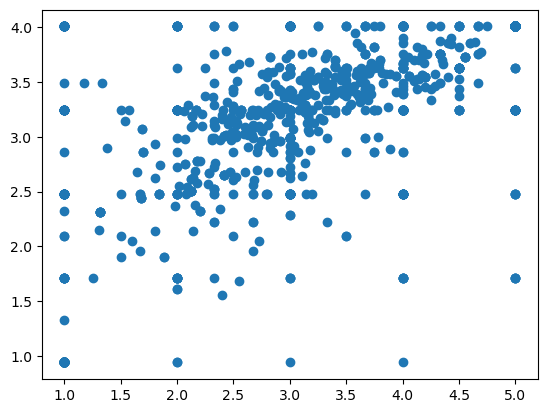

In [19]:
#code to show how well the model performmed in testing data
predictions2 = drugEaseOfUseRegressionModel.predict(X_test2)
plt.scatter(y_test2,predictions2)
plt.show()

In [20]:
#code to show how well the model performmed in testing data
drugEaseOfUseRegressionModel.score(X_test2, y_test2)

0.4104294215865315

The metric returns us the value: 0.4604063784240423. Which is 0.41(rounded to 2 decimal places).This means our model correctly classified 41% of the test samples in the test dataset. This is not a very high accuracy, but metrics alone is not the only way to evuluate the performance of the classifiaction model.There could be some data that was lost while training the model which may give it a low performance

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict 'satisfaction' based on 'effective' and 'easeofuse' separately. In this chapter we are going to look if we can make an even better prediction if we try to predict drug 'satisfaction' rate. based on BOTH of these together.

In [21]:
def linearRegression(xValue, yValue):
    model = LinearRegression().fit(xValue,yValue)
    yPrediction = model.predict(xValue)
    b1V2=model.coef_[0]
    print('The slope (b1): ',b1V2)

    b0V2=model.intercept_
    print('The intercept (b0): ',b0V2[0])
    det2=metrics.r2_score(yValue,yPrediction)
    print('Coefficient of determination: ',det2)



We begin with combining the two x's into one X:

In [22]:
#add code here to add the two x's into one
drugEffectivenesses = drugPerformanceDF['effective'].to_numpy().reshape(-1, 1)
drugEaseOfUse = drugPerformanceDF['easeofuse'].to_numpy().reshape(-1, 1)
drugSatisfaction = drugPerformanceDF['satisfaction'].to_numpy().reshape(-1, 1)

combinedX=np.hstack((drugEffectivenesses, drugEaseOfUse))

linearRegression(combinedX, drugSatisfaction)

The slope (b1):  [0.7948541  0.20158721]
The intercept (b0):  -0.40734270056209665
Coefficient of determination:  0.7039768807041608


To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [23]:
#code to split the data, and create & fit the model:
X_train_mr, X_test_mr, y_train_mr, y_test_mr = train_test_split(combinedX, drugSatisfaction, test_size=0.4, random_state=42)

# verify if the test is 40% of original drug performance dataset
print(0.4*combinedX.shape[0])
X_test_mr.shape[0]

887.6


888

In [24]:
multivariateRegressionModel = LinearRegression().fit(X_train_mr, y_train_mr)
y_prediction = multivariateRegressionModel.predict(X_train_mr)

#getting the idea of the coeffecient and intercepts
print('Intercept:', multivariateRegressionModel.intercept_)
print('Coefficients',multivariateRegressionModel.coef_)
X_train_mr

Intercept: [-0.402828]
Coefficients [[0.80389324 0.194782  ]]


array([[4.  , 2.5 ],
       [3.18, 4.53],
       [3.97, 4.56],
       ...,
       [3.  , 5.  ],
       [3.  , 5.  ],
       [1.  , 3.  ]])

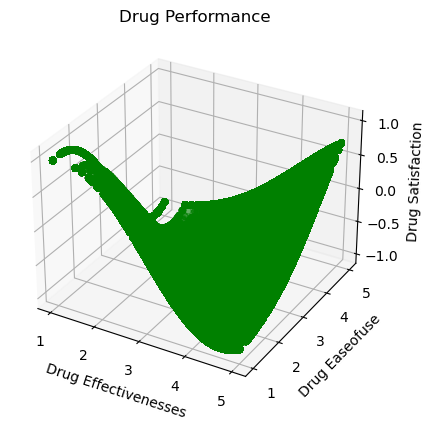

In [26]:
#3d plot
drugEffectivenessesX, drugEaseOfUseY = np.meshgrid(X_train_mr, y_train_mr)
drugSatisfactionZ=np.sin(np.sqrt(drugEffectivenessesX**2 + drugEaseOfUseY**2))

axes = plt.axes(projection ="3d")

#plot points
axes.scatter3D(drugEffectivenessesX, drugEaseOfUseY, drugSatisfactionZ, color = "green")
plt.title("Drug Performance")
axes.set_xlabel('Drug Effectivenesses')
axes.set_ylabel('Drug Easeofuse')
axes.set_zlabel('Drug Satisfaction')
plt.show()

A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

In [27]:
#code to show model summary and how well the model performmed
updatedX = sm.add_constant(X_train_mr)
mrModel=sm.OLS(y_train_mr,updatedX).fit()
newPred=mrModel.predict(updatedX)
mrModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1662.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:10:38   Log-Likelihood:                -1331.0
No. Observations:                1331   AIC:                             2668.
Df Residuals:                    1328   BIC:                             2684.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4028      0.073     -5.528      0.000      -0.546      -0.260
x1             0.8039      0.021     37.551      0.000       0.762       0.846
x2             0.1948      0.023      8.500      0.000       0.150       0.240
==============================================================================
Omnibus:                      357.182   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1792.276
Skew:                          -1.162   Prob(JB):                         0.00
Kurtosis:                       8.189   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Instead of looking at the R-square, we should be looking at the adjusted R-square. We use R-squared to check the how much of a good fit the regression model is. However in this case the R-Squared has a limitation, which is that is trends to increase as more and more independent variables are added to our model even if these variables do not directly influence the model. This could lead to overfitting and the model may not be able to generallize well with new data.

Adjusted R Squared on the other hand, discards any unnessary independent variables to our regression model and adjusts itself to the independent variables to model and only increases if the additional independent variables actually improve the fit and complexity of our model.

We also see more rows now in the 'coef' column. Our model includes more than one independent variables. The 'const' row tells us the intercept term in our regression model. This is the value when the all the independent variables in our model reaches zero.

The 'x1' and 'x2' rows represent the coefficients of our independent variables 'effective' and 'easeofuse'. The values tell us the estimated effect of each independent variables in our model with our dependent variable 'satisfaction' while holding all the other independent constant.

The model performs a bit better as compared the models in chapter 2, since we include multiple independent variables and show their estimated effect on the dependent variable. Which lead to more accurate and reliable results. In chapter 2 we only take one independent and one dependent variable to perform linear regression. Which could have lead to the results being biased or incomplete.

A last thing to do would be to check the VIF's:

In [28]:
#add code here to see the VIF's
[variance_inflation_factor(updatedX, j) for j in range(updatedX.shape[1])]

[16.301194396180485, 1.7494545049649666, 1.749454504964966]

The first one we can ignore this is a Variance Inflation Factor(VIF's) of a constant and does not have a clear interpretation. The high VIF value is not a big cause for concern.

We check the values in the second and third position, which is 1.749 (rounded to 3 decimal places) and are the same. Variance Inflation Factors(VIF) values of less than 5 are generally considered to not have any significant multicollinearity issues.

Based on the values, there appears to be no large multicollinearity issues among the independent variabels in our model, which is a good indication that the regression coefficient values are stable and the relationships between independent variables and dependent variable can be explained with confidence.

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict <span style='background:yellow'>\<your y-variable name></span> by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [ ]:
#add code to create an X variable using all variables, except of course your y variable:


We could first have a quick look at the results of this model:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and how well the model performmed:


However we have to be careful with those VIF's. So lets see:

In [ ]:
#add code here to show the VIF's.

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [ ]:
#add your function code here.


Lets run the function, and then use the result to create a new model:

In [ ]:
#add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [ ]:
#add your code here.


Finally lets see how this new model performs:

In [ ]:
#add code here to model and fit the new X with the y, and show the model summary and how well the model performmed:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [ ]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [ ]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----